# 决策树

In [1]:
from math import log
import operator

def createDataSet():
    dataSet = [[0, 0, 0, 0, 'no'],
               [0, 0, 0, 1, 'no'],
               [0, 1, 0, 1, 'yes'],
               [0, 1, 1, 0, 'yes'],
               [0, 0, 0, 0, 'no'],
               [1, 0, 0, 0, 'no'],
               [1, 0, 0, 1, 'no'],
               [1, 1, 1, 1, 'yes'],
               [1, 0, 1, 2, 'yes'],
               [1, 0, 1, 2, 'yes'],
               [2, 0, 1, 2, 'yes'],
               [2, 0, 1, 1, 'yes'],
               [2, 1, 0, 1, 'yes'],
               [2, 1, 0, 2, 'yes'],
               [2, 0, 0, 0, 'no']]
    labels = ['F1-AGE', 'F2-WORK', 'F3-HOME', 'F4-LOAN']
    return dataSet, labels

# 计算数据集的香农熵
def calcShannonEnt(dataset):
    # 获取数据集的样本数量
    numEntries = len(dataset)
    # 用于存储每个类别出现的次数
    labelCounts = {}
    # 遍历数据集中的每个样本
    for featVec in dataset:
        # 获取当前样本的类别标签
        currentLabel = featVec[-1]
        # 如果该类别标签还未在 labelCounts 中
        if currentLabel not in labelCounts.keys():
            # 初始化该类别标签的计数为 0
            labelCounts[currentLabel] = 0
        # 该类别标签的计数加 1
        labelCounts[currentLabel] += 1
    # 初始化香农熵为 0
    shannonEnt = 0.0
    # 遍历每个类别标签及其计数
    for key in labelCounts:
        # 计算该类别出现的概率
        prob = float(labelCounts[key]) / numEntries
        # 根据香农熵公式更新香农熵
        shannonEnt -= prob * log(prob, 2)
    # 返回计算得到的香农熵
    return shannonEnt

# 根据指定特征和特征值划分数据集
def splitDataSet(dataset, axis, value):
    retDataSet = []
    for featVec in dataset:
        if featVec[axis] == value:
            # 创建一个不包含指定划分特征的新样本
            # 提取当前样本中指定特征之前的部分
            reducedFeatVec = featVec[:axis]
            # 将当前样本中指定特征之后的部分添加到 reducedFeatVec 中
            reducedFeatVec.extend(featVec[axis + 1:])    
            # 将处理后的样本添加到划分后的数据集
            retDataSet.append(reducedFeatVec)
    return retDataSet

# 选择最佳的特征进行数据集划分
def chooseBestFeatureToSplit(dataset):
    # 获取特征的数量，减去 1 是因为最后一列是类别标签
    numFeatures = len(dataset[0]) - 1
    # 计算数据集的初始香农熵
    baseEntropy = calcShannonEnt(dataset)
    # 初始化最大信息增益为 0
    bestInfoGain = 0.0
    # 初始化最佳特征的索引为 -1
    bestFeature = -1
    # 遍历每个特征
    for i in range(numFeatures):
        # 获取该特征在所有样本中的值
        featList = [example[i] for example in dataset]
        # 获取该特征所有不同的值
        uniqueVals = set(featList)
        # 初始化划分后的香农熵为 0
        newEntropy = 0.0
        # 遍历该特征的每个不同值
        for value in uniqueVals:
            # 根据该特征的当前值划分数据集
            subDataSet = splitDataSet(dataset, i, value)
            # 计算该子集在数据集中所占的比例
            prob = len(subDataSet) / float(len(dataset))
            # 累加该子集的香农熵到 newEntropy
            newEntropy += prob * calcShannonEnt(subDataSet)
        # 计算信息增益
        infoGain = baseEntropy - newEntropy
        # 如果当前信息增益大于最大信息增益
        if infoGain > bestInfoGain:
            # 更新最大信息增益
            bestInfoGain = infoGain
            # 更新最佳特征的索引
            bestFeature = i
    # 返回最佳特征的索引
    return bestFeature

# 当无法继续划分时，返回出现次数最多的类别
def majorityCnt(classList):
    # 用于存储每个类别出现的次数
    classCount = {}
    # 遍历类别列表
    for vote in classList:
        # 如果该类别还未在 classCount 中
        if vote not in classCount.keys():
            # 初始化该类别的计数为 0
            classCount[vote] = 0
        # 该类别的计数加 1
        classCount[vote] += 1
    # 对类别计数进行排序，按照计数从大到小排列
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)
    # 返回出现次数最多的类别
    return sortedClassCount[0][0]

# 递归地构建决策树
def createTree(dataset, labels, featLabels):
    # 获取数据集中所有样本的类别标签
    classList = [example[-1] for example in dataset]
    # 如果所有样本的类别标签都相同
    if classList.count(classList[0]) == len(classList):
        # 直接返回该类别标签
        return classList[0]
    # 如果数据集中只剩下类别标签这一列
    if len(dataset[0]) == 1:
        # 返回出现次数最多的类别标签
        return majorityCnt(classList)
    # 选择最佳的特征进行划分
    bestFeat = chooseBestFeatureToSplit(dataset)
    # 获取最佳特征的名称
    bestFeatLabel = labels[bestFeat]
    # 将最佳特征的名称添加到特征标签列表中
    featLabels.append(bestFeatLabel)
    # 初始化决策树，以最佳特征为根节点
    myTree = {bestFeatLabel: {}}
    # 从标签列表中删除最佳特征的名称
    del (labels[bestFeat])
    # 获取最佳特征在所有样本中的值
    featValues = [example[bestFeat] for example in dataset]
    # 获取最佳特征所有不同的值
    uniqueVals = set(featValues)
    # 遍历最佳特征的每个不同值
    for value in uniqueVals:
        # 复制标签列表，避免修改原始列表
        subLabels = labels[:]
        # 递归地构建子树
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataset, bestFeat, value), subLabels, featLabels)
    return myTree

if __name__ == "__main__":
    # 创建示例数据集和特征标签列表
    dataset, labels = createDataSet()
    featLabels = []
    myTree = createTree(dataset, labels, featLabels)
    print(myTree)           

{'F3-HOME': {0: {'F2-WORK': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


# 树模型的可视化

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:,2:]  # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

在cmd中输入dot -Tpng iris_tree.dot -o iris_tree.png这个命令，将dot文件转换为png文件

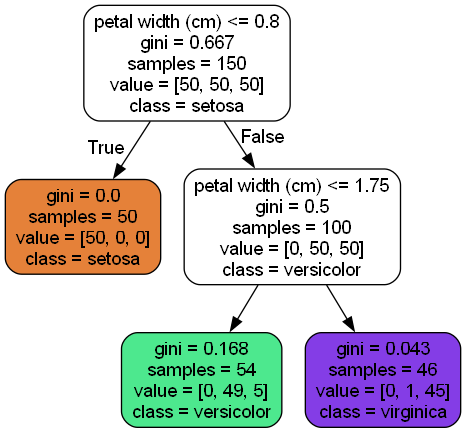

In [4]:
from IPython.display import Image
Image(filename = 'iris_tree.png', width = 400, height = 400)

# 决策边界展示分析

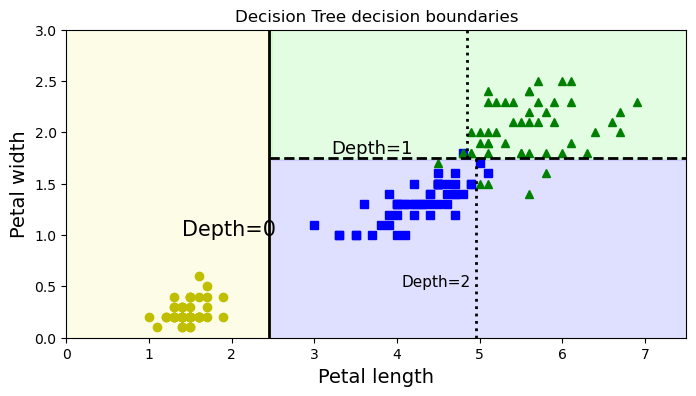

In [5]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "Depth=2", fontsize=11)
plt.title('Decision Tree decision boundaries')
plt.show()

# 展示预剪枝参数的作用

* min_samples_split（节点在分割之前必须具有的最小样本数）

* min_samples_leaf（叶子节点必须具有的最小样本数）

* max_leaf_nodes（叶子节点的最大数量）

* max_depth（树最大的深度）



Text(0.5, 1.0, 'min_samples_leaf = 4')

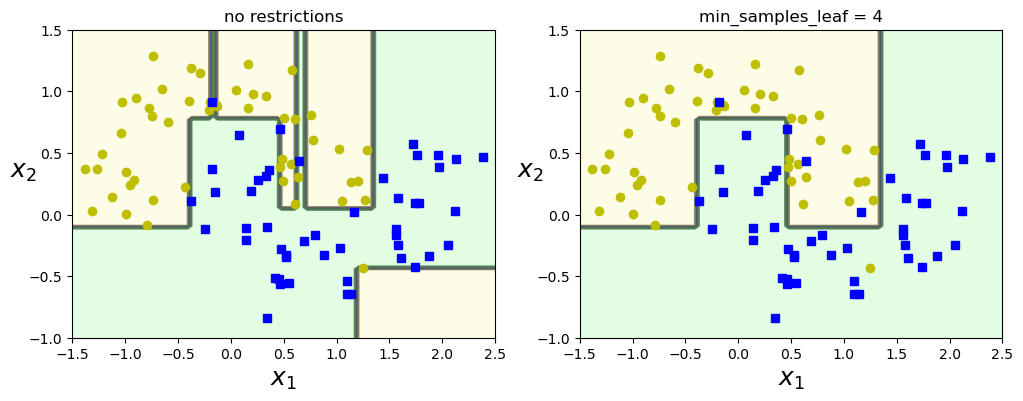

In [6]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100, noise = 0.25, random_state = 53)
tree_clf1 = DecisionTreeClassifier(random_state = 42)
tree_clf2 = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 4)
tree_clf1.fit(X,y)
tree_clf2.fit(X,y)

plt.figure(figsize = (12,4))
plt.subplot(121)
plot_decision_boundary(tree_clf1, X, y,axes=[-1.5,2.5,-1,1.5],iris = False)
plt.title('no restrictions')

plt.subplot(122)
plot_decision_boundary(tree_clf2, X, y,axes=[-1.5,2.5,-1,1.5],iris = False)

plt.title('min_samples_leaf = 4')


# 回归任务

In [7]:
import numpy as np
np.random.seed(42)
m = 200
X = np.random.rand(m,1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m,1)/10


In [8]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [9]:
export_graphviz(
    tree_reg,
    out_file = ("regression_tree.dot"),
    rounded = True,
    filled = True
)

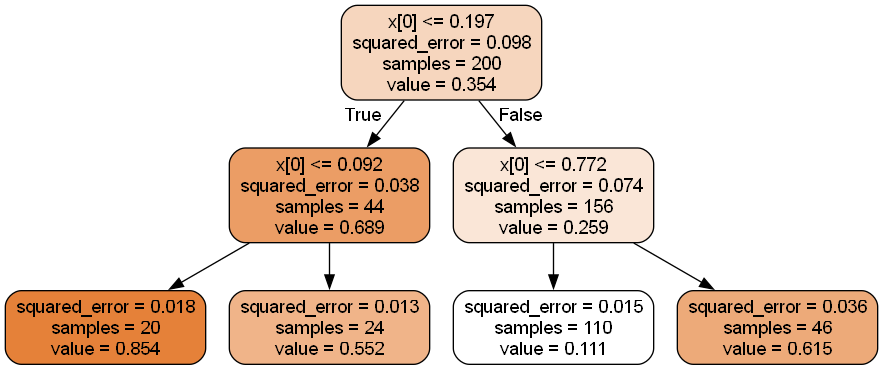

In [11]:
#做回归任务的决策树
from IPython.display import Image
Image(filename = "regression_tree.png", width = 400, height = 400)